<a href="https://colab.research.google.com/github/Mahima-R-S/household-animal-classification/blob/main/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.models import load_model

# Load your fine-tuned model
model = load_model("/content/drive/MyDrive/vgg16_finetuned_model.h5")


In [3]:
train_dir = "/content/drive/MyDrive/dataset/cat-and-dog/training_set/training_set"
test_dir  = "/content/drive/MyDrive/dataset/cat-and-dog/test_set/test_set"

# sanity check
print(os.path.exists(train_dir), os.path.exists(test_dir))

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_set = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)


True True
Found 8005 images belonging to 2 classes.
Found 2022 images belonging to 2 classes.


In [ ]:
import os
from PIL import Image

def clean_directory(folder):
    for root, _, files in os.walk(folder):
        for f in files:
            file_path = os.path.join(root, f)
            try:
                # skip non-image extensions
                if not f.lower().endswith(('.png', '.jpg', '.jpeg')):
                    os.remove(file_path)
                    continue
                # try opening to confirm it's a valid image
                img = Image.open(file_path)
                img.verify()
            except Exception:
                print(f"Removing invalid file: {file_path}")
                os.remove(file_path)

clean_directory("/content/drive/MyDrive/dataset/cat-and-dog/training_set/training_set")
clean_directory("/content/drive/MyDrive/dataset/cat-and-dog/test_set/test_set")



Removing invalid file: /content/drive/MyDrive/dataset/cat-and-dog/test_set/test_set/cats/cat.4023.jpg


In [14]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_set = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

test_set = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    shuffle=False
)


Found 6404 images belonging to 2 classes.
Found 1601 images belonging to 2 classes.


In [15]:
vgg6 = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(224,224,3)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

vgg6.compile(optimizer=RMSprop(learning_rate=1e-4),
             loss='binary_crossentropy',
             metrics=['accuracy'])

history_vgg6 = vgg6.fit(
    train_set,
    validation_data=test_set,
    epochs=25,
    batch_size=32
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
201/201 ━━━━━━━━━━━━━━━━━━━━ 68s 297ms/step - accuracy: 0.5344 - loss: 0.6874 - val_accuracy: 0.6290 - val_loss: 0.6400
Epoch 2/25
201/201 ━━━━━━━━━━━━━━━━━━━━ 35s 174ms/step - accuracy: 0.6623 - loss: 0.6203 - val_accuracy: 0.6927 - val_loss: 0.5906
Epoch 3/25
201/201 ━━━━━━━━━━━━━━━━━━━━ 35s 174ms/step - accuracy: 0.7116 - loss: 0.5620 - val_accuracy: 0.7021 - val_loss: 0.5689
Epoch 4/25
201/201 ━━━━━━━━━━━━━━━━━━━━ 35s 171ms/step - accuracy: 0.7187 - loss: 0.5455 - val_accuracy: 0.7089 - val_loss: 0.5565
Epoch 5/25
201/201 ━━━━━━━━━━━━━━━━━━━━ 35s 174ms/step - accuracy: 0.7312 - loss: 0.5219 - val_accuracy: 0.7352 - val_loss: 0.5346
Epoch 6/25
201/201 ━━━━━━━━━━━━━━━━━━━━ 36s 177ms/step - accuracy: 0.7618 - loss: 0.5010 - val_accuracy: 0.7414 - val_loss: 0.5277
Epoch 7/25
201/201 ━━━━━━━━━━━━━━━━━━━━ 35s 171ms/step - accuracy: 0.7815 - loss: 0.4756 - val_accuracy: 0.7595 - val_loss: 0.4960
Epoch 8/25
201/201 ━━━━━━━━━━━━━━━━━━━━ 35s 172ms/step - accuracy: 0.7814 - loss: 0

In [16]:
pickle.dump(history_vgg6.history, open("/content/drive/MyDrive/history_vgg6.pkl", "wb"))

In [17]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))

# freeze pretrained convolutional base
for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

vgg16 = Model(inputs=base_model.input, outputs=output)

vgg16.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_vgg16 = vgg16.fit(
    train_set,
    validation_data=test_set,
    epochs=15,
    batch_size=32
)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/15
201/201 ━━━━━━━━━━━━━━━━━━━━ 51s 238ms/step - accuracy: 0.7769 - loss: 0.4586 - val_accuracy: 0.9063 - val_loss: 0.2250
Epoch 2/15
201/201 ━━━━━━━━━━━━━━━━━━━━ 41s 204ms/step - accuracy: 0.9117 - loss: 0.2083 - val_accuracy: 0.9207 - val_loss: 0.1885
Epoch 3/15
201/201 ━━━━━━━━━━━━━━━━━━━━ 41s 205ms/step - accuracy: 0.9452 - loss: 0.1457 - val_accuracy: 0.9250 - val_loss: 0.1849
Epoch 4/15
201/201 ━━━━━━━━━━━━━━━━━━━━ 41s 204ms/step - accuracy: 0.9456 - loss: 0.1392 - val_accuracy: 0.9094 - val_loss: 0.2184
Epoch 5/15
201/201 ━━━━━━━━━━━━━━━━━━━━ 41s 205ms/step - accuracy: 0.9633 - loss: 0.0988 - val_accuracy: 0.9044 - val_loss: 0.2250
Epoch 6/15
201/201 ━━━━━━━━━━━━━━━━━━━━ 41s 205ms/step - accuracy: 0.9692 - loss: 0.0871 - val_accuracy: 0.9275 - val_loss: 0.1757
Epoch 7/15
201/201 ━━━━━━━━━━━━━━━━━━━━ 41s 206ms/step - accuracy: 0.9773 - loss: 0.0726 - val_accuracy: 0.9194 - val_loss: 0.2015
Epoch 8/15
201/201 ━━━━━━━━━━━━━

In [18]:
pickle.dump(history_vgg16.history, open("/content/drive/MyDrive/history_vgg16.pkl", "wb"))

In [ ]:
vgg6.save("/content/drive/MyDrive/vgg6_model.h5")
vgg16.save("/content/drive/MyDrive/vgg16_transfer_model.h5")


In [4]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam

# Load the pretrained transfer model
vgg16 = load_model("/content/drive/MyDrive/vgg16_transfer_model.h5")




In [5]:
# Unfreeze top layers for fine-tuning
for layer in vgg16.layers:
    if layer.name.startswith('block5') or layer.name.startswith('block4'):
        layer.trainable = True
    else:
        layer.trainable = False


In [6]:
from tensorflow.keras.optimizers import Adam

vgg16.compile(optimizer=Adam(learning_rate=1e-5),  # smaller LR
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [8]:
history_finetune = vgg16.fit(
    train_set,
    validation_data=test_set,
    epochs=10,  # you can increase slightly
    batch_size=32
)


Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 2287s 9s/step - accuracy: 0.9455 - loss: 0.1501 - val_accuracy: 0.9580 - val_loss: 0.1266
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 144s 573ms/step - accuracy: 0.9717 - loss: 0.0719 - val_accuracy: 0.9634 - val_loss: 0.1036
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 143s 570ms/step - accuracy: 0.9837 - loss: 0.0469 - val_accuracy: 0.9555 - val_loss: 0.1220
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 144s 573ms/step - accuracy: 0.9843 - loss: 0.0428 - val_accuracy: 0.9664 - val_loss: 0.1161
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 143s 567ms/step - accuracy: 0.9886 - loss: 0.0332 - val_accuracy: 0.9481 - val_loss: 0.1908
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 143s 570ms/step - accuracy: 0.9897 - loss: 0.0294 - val_accuracy: 0.9688 - val_loss: 0.0961
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 143s 571ms/step - accuracy: 0.9942 - loss: 0.0163 - val_accuracy: 0.9698 - val_loss: 0.1036
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 143s 568ms/step - accuracy: 0.9949 - l

In [9]:
vgg16.save("/content/drive/MyDrive/vgg16_finetuned_model.h5")


In [10]:
from tensorflow.keras.models import load_model

model_vgg6 = load_model('/content/drive/MyDrive/vgg6_model.h5')
model_vgg16 = load_model('/content/drive/MyDrive/vgg16_transfer_model.h5')
model_fine = load_model('/content/drive/MyDrive/vgg16_finetuned_model.h5')

print("VGG-6 accuracy:", model_vgg6.evaluate(test_set))
print("VGG-16 accuracy:", model_vgg16.evaluate(test_set))
print("Fine-tuned accuracy:", model_fine.evaluate(test_set))


64/64 ━━━━━━━━━━━━━━━━━━━━ 11s 151ms/step - accuracy: 0.8073 - loss: 0.5617
VGG-6 accuracy: [0.624173641204834, 0.7977250218391418]
64/64 ━━━━━━━━━━━━━━━━━━━━ 12s 174ms/step - accuracy: 0.9293 - loss: 0.2232
VGG-16 accuracy: [0.21238666772842407, 0.9292779564857483]
64/64 ━━━━━━━━━━━━━━━━━━━━ 12s 174ms/step - accuracy: 0.9738 - loss: 0.1170
Fine-tuned accuracy: [0.11220495402812958, 0.970820963382721]


In [13]:
import pickle

pickle.dump(history_finetune.history, open("/content/drive/MyDrive/history_finetune.pkl", "wb"))


In [19]:
import pickle

with open("/content/drive/MyDrive/history_vgg6.pkl", "rb") as f:
    history_vgg6 = pickle.load(f)

with open("/content/drive/MyDrive/history_vgg16.pkl", "rb") as f:
    history_vgg16 = pickle.load(f)

with open("/content/drive/MyDrive/history_finetune.pkl", "rb") as f:
    history_finetune = pickle.load(f)


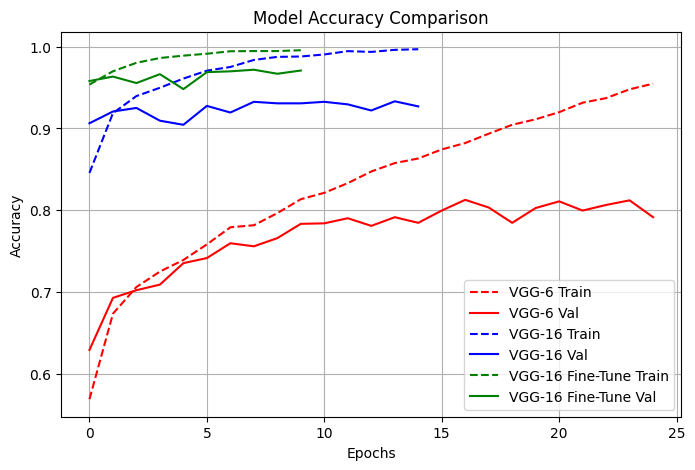

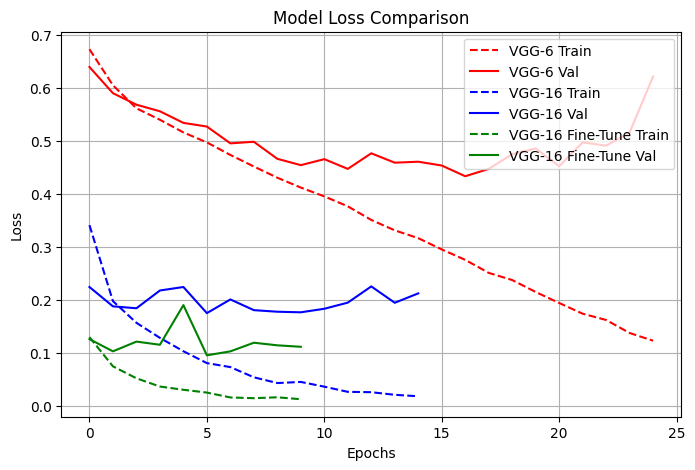

In [20]:
import matplotlib.pyplot as plt

# --- Accuracy Comparison ---
plt.figure(figsize=(8,5))
plt.plot(history_vgg6['accuracy'], 'r--', label='VGG-6 Train')
plt.plot(history_vgg6['val_accuracy'], 'r', label='VGG-6 Val')
plt.plot(history_vgg16['accuracy'], 'b--', label='VGG-16 Train')
plt.plot(history_vgg16['val_accuracy'], 'b', label='VGG-16 Val')
plt.plot(history_finetune['accuracy'], 'g--', label='VGG-16 Fine-Tune Train')
plt.plot(history_finetune['val_accuracy'], 'g', label='VGG-16 Fine-Tune Val')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# --- Loss Comparison ---
plt.figure(figsize=(8,5))
plt.plot(history_vgg6['loss'], 'r--', label='VGG-6 Train')
plt.plot(history_vgg6['val_loss'], 'r', label='VGG-6 Val')
plt.plot(history_vgg16['loss'], 'b--', label='VGG-16 Train')
plt.plot(history_vgg16['val_loss'], 'b', label='VGG-16 Val')
plt.plot(history_finetune['loss'], 'g--', label='VGG-16 Fine-Tune Train')
plt.plot(history_finetune['val_loss'], 'g', label='VGG-16 Fine-Tune Val')
plt.title('Model Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras import Input

# Path of any test image
img_path = "/content/drive/MyDrive/dataset/cat-and-dog/test_set/test_set/dogs/dog.4001.jpg"

# Load & preprocess image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0


In [ ]:
# Rebuild a small functional model from your existing sequential one
inputs = Input(shape=(224, 224, 3))
x = inputs
outputs = []
for layer in vgg6.layers:
    x = layer(x)
    if 'conv' in layer.name:
        outputs.append(x)

activation_model = Model(inputs=inputs, outputs=outputs)


In [ ]:
activations = activation_model.predict(img_array)
layer_names = [layer.name for layer in vgg6.layers if 'conv' in layer.name]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


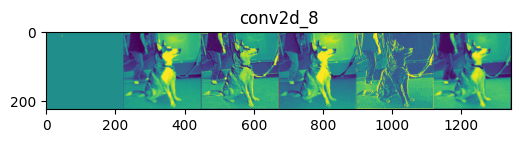

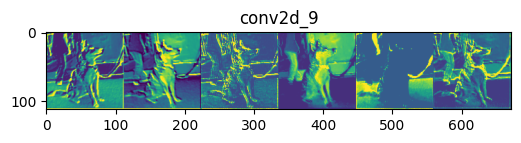

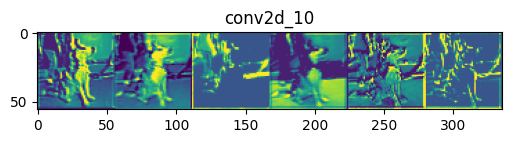

In [ ]:
for layer_name, layer_activation in zip(layer_names[:3], activations[:3]):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]

    n_cols = 6  # number of feature maps to display
    display_grid = np.zeros((size, n_cols * size))

    for col in range(n_cols):
        channel_image = layer_activation[0, :, :, col]
        channel_image -= channel_image.mean()
        channel_image /= (channel_image.std() + 1e-5)
        channel_image *= 64
        channel_image += 128
        channel_image = np.clip(channel_image, 0, 255).astype('uint8')
        display_grid[:, col * size : (col + 1) * size] = channel_image

    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    plt.show()


In [19]:
vgg6.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,663,875 (25.42 MB)

 Trainable params: 6,663,873 (25.42 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

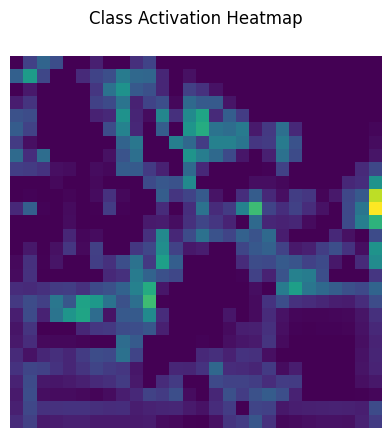

/tmp/ipython-input-18478865.py:53: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  jet = cm.get_cmap("jet")


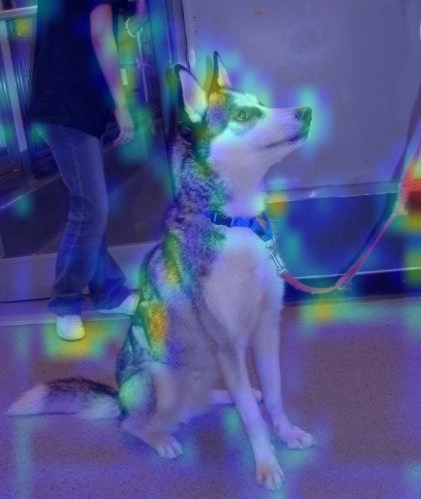

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from PIL import Image
from tensorflow.keras.models import Model
from tensorflow.keras import Input
from tensorflow.keras.preprocessing import image

# 🔹 Path to your test image
img_path = "/content/drive/MyDrive/dataset/cat-and-dog/test_set/test_set/dogs/dog.4001.jpg"

# 🔹 Load & preprocess image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

# 🔹 Build a functional model manually to avoid Sequential.input issues
inputs = Input(shape=(224, 224, 3))
x = inputs
for layer in vgg6.layers:
    x = layer(x)
    if layer.name == 'conv2d_11':  # pick the last conv layer
        last_conv_output = x

heatmap_model = Model(inputs=inputs, outputs=[last_conv_output, x])

# 🔹 Forward pass + compute gradients
with tf.GradientTape() as tape:
    conv_outputs, predictions = heatmap_model(img_array)
    tape.watch(conv_outputs)
    predicted_class = predictions[:, 0]

# 🔹 Gradients and importance weighting
grads = tape.gradient(predicted_class, conv_outputs)
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
conv_outputs = conv_outputs[0]
heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_outputs), axis=-1)

# 🔹 Normalize heatmap
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

# 🔹 Display raw heatmap
plt.matshow(heatmap, cmap='viridis')
plt.title("Class Activation Heatmap")
plt.axis("off")
plt.show()

# 🔹 Overlay heatmap on original image
img = Image.open(img_path).convert("RGB")
heatmap_resized = np.uint8(255 * heatmap)
jet = cm.get_cmap("jet")
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap_resized]

jet_heatmap = Image.fromarray((jet_heatmap * 255).astype(np.uint8)).resize(img.size)
superimposed_img = Image.blend(img.convert("RGBA"), jet_heatmap.convert("RGBA"), alpha=0.4)

# 🔹 Display overlayed image
display(superimposed_img)


/tmp/ipython-input-3854665708.py:55: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  jet = cm.get_cmap("jet")


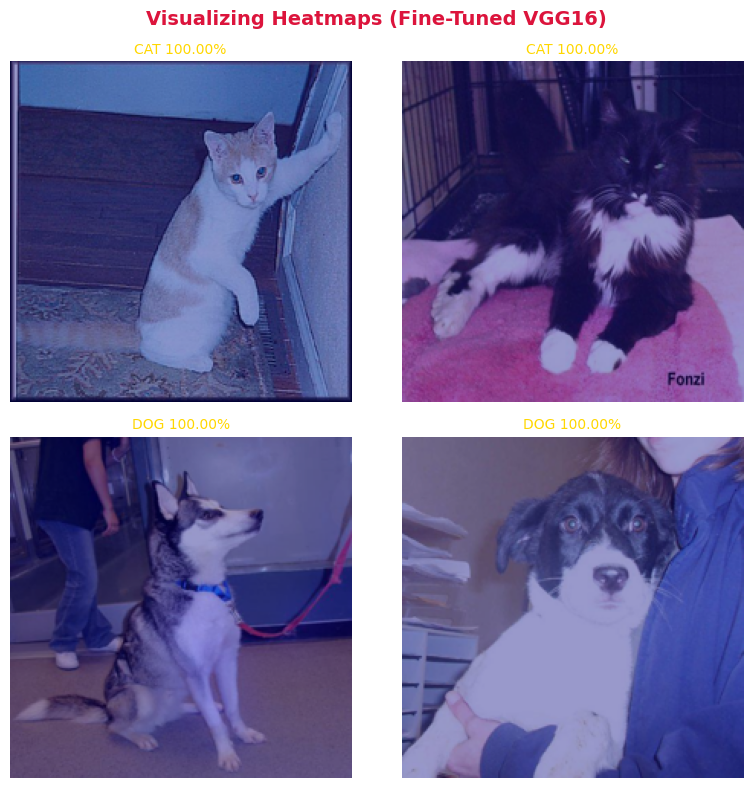

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model, load_model
from PIL import Image
import os

# --- Load fine-tuned model ---
model = load_model("/content/drive/MyDrive/vgg16_finetuned_model.h5")
last_conv_layer_name = 'block5_conv3'   # last conv layer in VGG16

# --- Test image paths (4 examples) ---
test_img_paths = [
    "/content/drive/MyDrive/dataset/cat-and-dog/test_set/test_set/cats/cat.4001.jpg",
    "/content/drive/MyDrive/dataset/cat-and-dog/test_set/test_set/cats/cat.4010.jpg",
    "/content/drive/MyDrive/dataset/cat-and-dog/test_set/test_set/dogs/dog.4001.jpg",
    "/content/drive/MyDrive/dataset/cat-and-dog/test_set/test_set/dogs/dog.4010.jpg"
]

# --- Grad-CAM function ---
def make_gradcam_heatmap(img_array, model, last_conv_layer_name):
    grad_model = Model(
        inputs=model.input,
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_outputs), axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap) + 1e-8
    return heatmap, predictions[0][0]

# --- Plot multiple heatmaps ---
plt.figure(figsize=(8, 8))
for i, img_path in enumerate(test_img_paths):
    # Load and preprocess
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = np.expand_dims(image.img_to_array(img) / 255.0, axis=0)

    # Compute heatmap
    heatmap, pred = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

    # Overlay heatmap on original image
    img_pil = Image.open(img_path).convert("RGB").resize((224, 224))
    heatmap_resized = np.uint8(255 * heatmap)
    jet = cm.get_cmap("jet")
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap_resized]
    jet_heatmap = Image.fromarray((jet_heatmap * 255).astype(np.uint8)).resize(img_pil.size)
    superimposed_img = Image.blend(img_pil.convert("RGBA"), jet_heatmap.convert("RGBA"), alpha=0.4)

    # Display
    plt.subplot(2, 2, i + 1)
    plt.imshow(superimposed_img)
    label = "cat" if pred < 0.5 else "dog"
    conf = (1 - pred) if pred < 0.5 else pred
    plt.title(f"{label.upper()} {conf*100:.2f}%", color="gold", fontsize=10)
    plt.axis("off")

plt.suptitle("Visualizing Heatmaps (Fine-Tuned VGG16)", fontsize=14, color="crimson", fontweight="bold")
plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


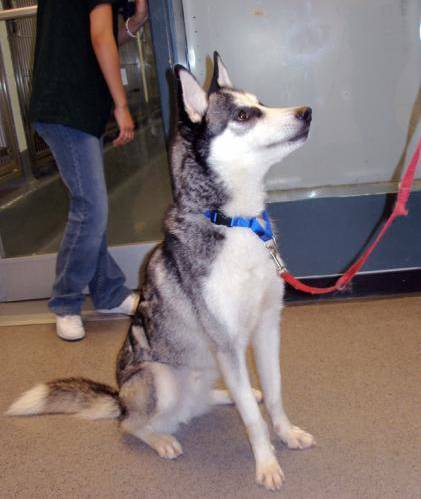

Prediction: Dog  |  Confidence: 0.9011


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from IPython.display import display
from PIL import Image

# Path of your test image
img_path = "/content/drive/MyDrive/dataset/cat-and-dog/test_set/test_set/dogs/dog.4001.jpg"

# Load and preprocess
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Predict
prediction = vgg6.predict(img_array)
label = "Dog" if prediction[0][0] > 0.5 else "Cat"

display(Image.open(img_path))
print(f"Prediction: {label}  |  Confidence: {prediction[0][0]:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


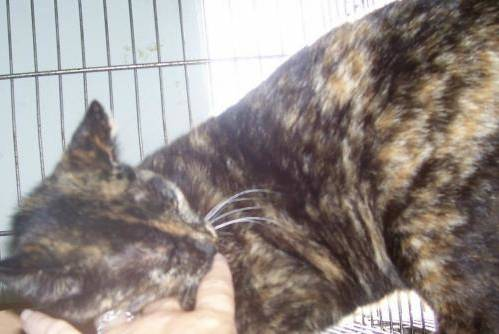

Prediction: Cat  |  Confidence: 0.0784


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from IPython.display import display
from PIL import Image

# Path of your test image
img_path = "/content/drive/MyDrive/dataset/cat-and-dog/test_set/test_set/cats/cat.4006.jpg"

# Load and preprocess
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Predict
prediction = vgg6.predict(img_array)
label = "Dog" if prediction[0][0] > 0.5 else "Cat"

display(Image.open(img_path))
print(f"Prediction: {label}  |  Confidence: {prediction[0][0]:.4f}")